# Задание 1.1

In [122]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.distributions.empirical_distribution import ECDF
from scipy import stats
import math
import pandas as pd

plt.style.use("fivethirtyeight")

Для генерации выборки используем библиотечную функцию:

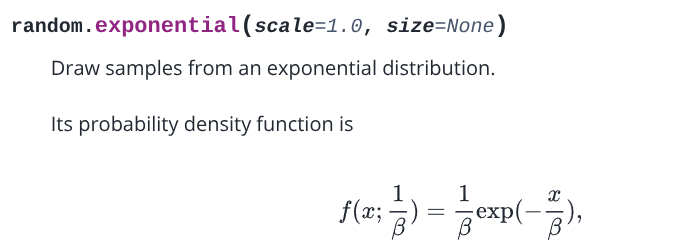


In [123]:
# Задаем выборку

n = 25
scale = 1.0
sample = np.random.exponential(scale=scale, size=n)

sample

array([0.56917505, 0.34159812, 0.00678814, 3.52662122, 0.4334828 ,
       2.14257085, 0.05506605, 0.85546613, 0.94459512, 1.35066514,
       1.38165789, 0.02633896, 1.28756139, 0.043318  , 0.43017348,
       1.36711425, 0.4175996 , 0.40318526, 1.48976321, 2.20675007,
       0.92745353, 1.11573189, 0.64067424, 1.24053241, 0.54608516])

In [124]:
# Для непрерывных данных мода оценивается через интервалы
hist, bins = np.histogram(sample, bins='auto')
mode_bin_index = np.argmax(hist)
mode_estimate = (bins[mode_bin_index] + bins[mode_bin_index + 1]) / 2

median = sorted(sample)[n // 2] if (n % 2 == 1) else (sorted(sample)[n // 2 - 1] + sorted(sample)[n // 2]) / 2

sample_range = max(sample) - min(sample)


def asymmetry_coefficient(data):
    μ3 = np.average((data - np.average(data))** 3)
    σ = np.sqrt(np.var(data))
    return μ3 / σ**3


sample_asymmetry = asymmetry_coefficient(sample)

print(f"Мода = {mode_estimate}")
print(f"Медиана = {median}")
print(f"Размах выборки = {sample_range}")
print(f"Коэффициент асимметрии = {sample_asymmetry}")


Мода = 0.30010756576141606
Медиана = 0.8554661291428404
Размах выборки = 3.5198330759839744
Коэффициент асимметрии = 1.3481017856284763


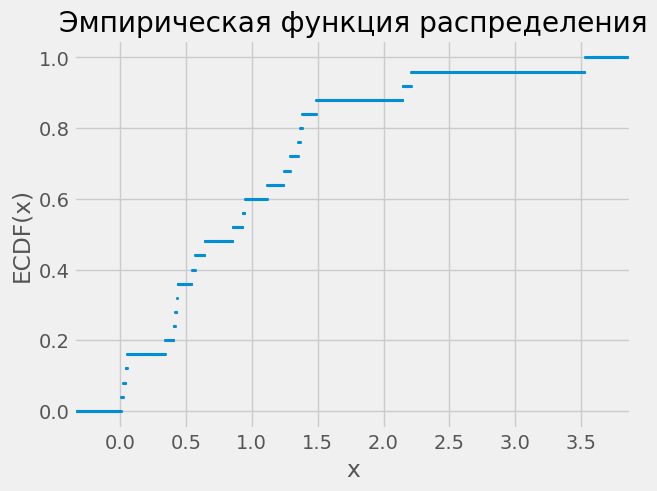

In [125]:
ecdf = ECDF(sample)

x_min = sample.min() - 0.1 * (sample.max() - sample.min())
x_max = sample.max() + 0.1 * (sample.max() - sample.min())

x_values = np.linspace(x_min, x_max, 1000)
y_values = ecdf(x_values)  

plt.scatter(x_values, y_values, s=3)
plt.xlabel('x')
plt.ylabel('ECDF(x)')
plt.title('Эмпирическая функция распределения')
plt.xlim(x_min, x_max)
plt.show()

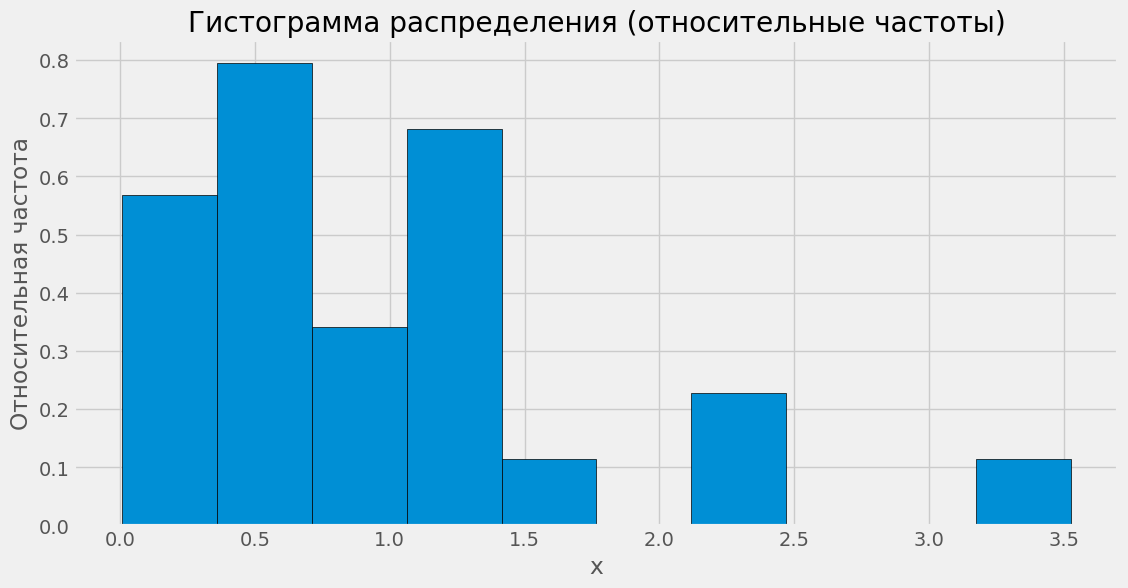

In [126]:
plt.figure(figsize=(12, 6))
plt.hist(sample, edgecolor='black', density=True)

plt.xlabel('x')
plt.ylabel('Относительная частота')
plt.title('Гистограмма распределения (относительные частоты)')
plt.show()

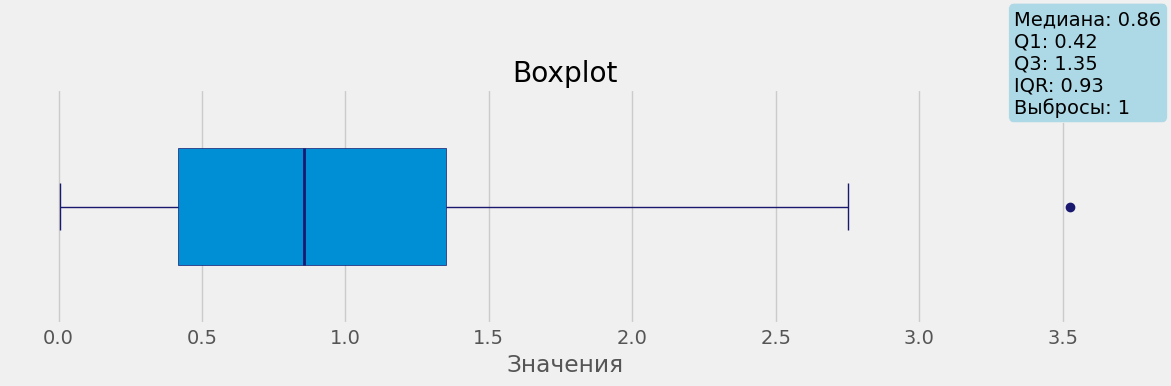

In [127]:
q1 = np.percentile(sample, 25)
q2 = np.median(sample)
q3 = np.percentile(sample, 75)
iqr = q3 - q1
lower_whisker = max(sample.min(), q1 - 1.5 * iqr)
upper_whisker = min(sample.max(), q3 + 1.5 * iqr)
outliers = sample[(sample < lower_whisker) | (sample > upper_whisker)]


stats_text = f'Медиана: {q2:.2f}\n'
stats_text += f'Q1: {q1:.2f}\n'
stats_text += f'Q3: {q3:.2f}\n'
stats_text += f'IQR: {iqr:.2f}\n'
stats_text += f'Выбросы: {len(outliers)}'

plt.figure(figsize=(12, 4))

# box = plt.boxplot(sample, vert=False, patch_artist=True,
#                   boxprops=dict(facecolor='lightblue'),
#                   medianprops=dict(color='midnightblue', linewidth=2))


plt.plot([lower_whisker, q1], [1, 1], color='midnightblue', linewidth=1)
plt.plot([q3, upper_whisker], [1, 1], color='midnightblue', linewidth=1)
plt.plot([lower_whisker, lower_whisker], [0.9, 1.1], color='midnightblue', linewidth=1)
plt.plot([upper_whisker, upper_whisker], [0.9, 1.1], color='midnightblue', linewidth=1)

plt.barh(1, q3 - q1, left=q1, height=0.5, edgecolor='midnightblue')
plt.plot([q2, q2], [0.75, 1.25], color='midnightblue', linewidth=2)

if len(outliers) > 0:
    plt.plot(outliers, [1] * len(outliers), 'o', color='midnightblue', markersize=6)
    

plt.text(plt.xlim()[1]*0.9, 1.4, stats_text, 
         bbox=dict(boxstyle="round,pad=0.3", facecolor="lightblue"))

plt.xlabel('Значения')
plt.title('Boxplot')
plt.ylim(0.5, 1.5)
plt.yticks([])

plt.tight_layout()
plt.show()

## Сравнить оценку плотности распределения среднего арифметического 

### С помощью ЦПТ

In [128]:
# Для экспоненциального распределения теоретические параметры:
# E[X] = scale, Var[X] = scale^2
# (Учитываем, что \frac{1}{\beta} \exp\left(-\frac{x}{\beta}\right))
theoretical_mean = scale
theoretical_se = scale / np.sqrt(n)


### BOOTSTRAP

In [129]:
N = 10000  # подвыборок объема n с повторением элементов

bootstrap_means = np.zeros(shape=N)
for i in range(N):
    bootstrap_sample = np.random.choice(sample, size=n)
    bootstrap_means[i] = np.mean(bootstrap_sample)


bootstrap_mean = np.mean(bootstrap_means)
bootstrap_std = np.std(bootstrap_means)

### Сравнение ЦПТ и BOOTSTRAP

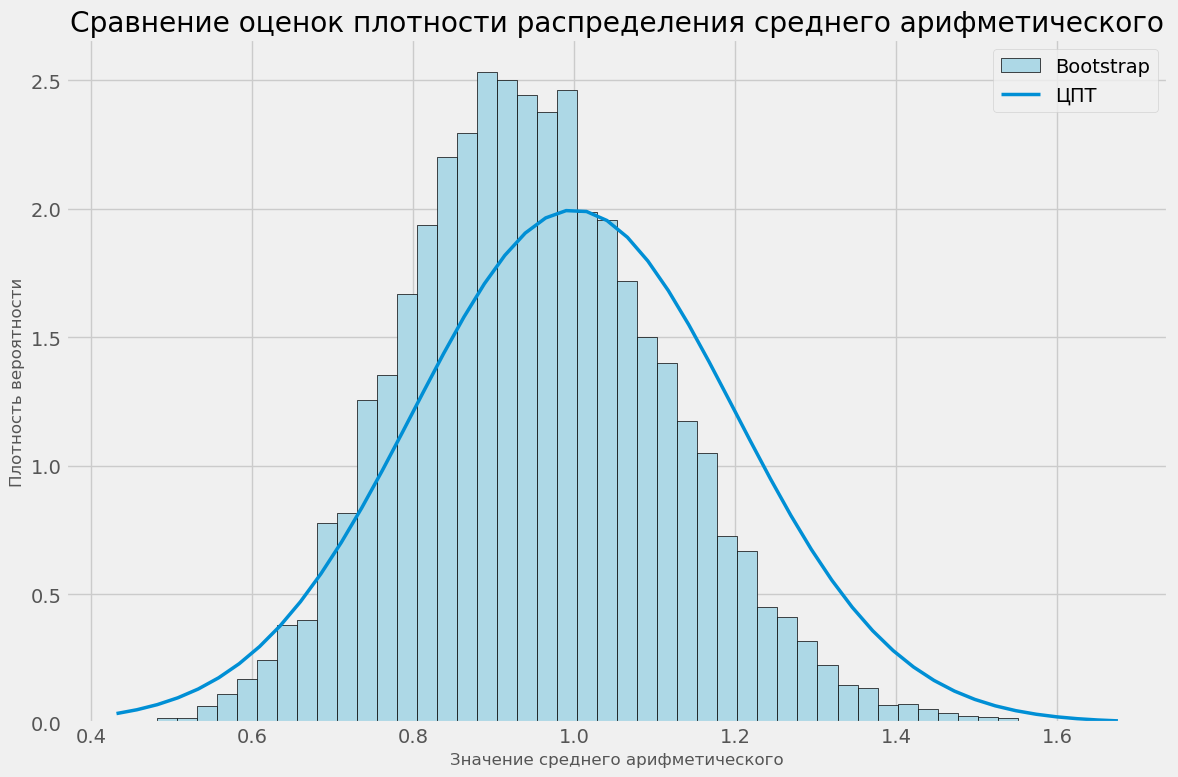

Сравнение оценок плотности распределения среднего (в численных значениях):
  Параметр       ЦПТ  Bootstrap
0        μ  1.000000   0.951402
1        σ  0.200000   0.161094
2       q1  0.865102   0.839262
3       q2  1.000000   0.942545
4       q3  1.134898   1.055501


In [130]:
plt.figure(figsize=(12, 8))

plt.hist(bootstrap_means, bins=50, density=True, 
         color='lightblue', edgecolor='black', 
         label='Bootstrap')

x = np.linspace(bootstrap_means.min(), bootstrap_means.max())
y = stats.norm.pdf(x, theoretical_mean, theoretical_se)
plt.plot(x, y, linewidth=2.5, 
         label='ЦПТ')


plt.xlabel('Значение среднего арифметического', fontsize=12)
plt.ylabel('Плотность вероятности', fontsize=12)
plt.title('Сравнение оценок плотности распределения среднего арифметического')
plt.legend()
plt.tight_layout()
plt.show()


comparison_df = pd.DataFrame({
    'Параметр': ['μ', 'σ', 'q1', 'q2', 'q3'],
    'ЦПТ': [
        theoretical_mean,
        theoretical_se,
        stats.norm.ppf(0.25, theoretical_mean, theoretical_se),
        stats.norm.ppf(0.5, theoretical_mean, theoretical_se),
        stats.norm.ppf(0.75, theoretical_mean, theoretical_se),
    ],
    'Bootstrap': [
        bootstrap_mean, 
        bootstrap_std,
        np.percentile(bootstrap_means, 25),
        np.percentile(bootstrap_means, 50),
        np.percentile(bootstrap_means, 75),
    ]
})

print("Сравнение оценок плотности распределения среднего (в численных значениях):")
print(comparison_df)


## Bootstrap оценка плотности распределения коэффициента асимметрии 

Параметры оценки: 
μ = 1.0563828763624823
σ = 0.5532137433729282
Вероятность того, что <1: 0.4226


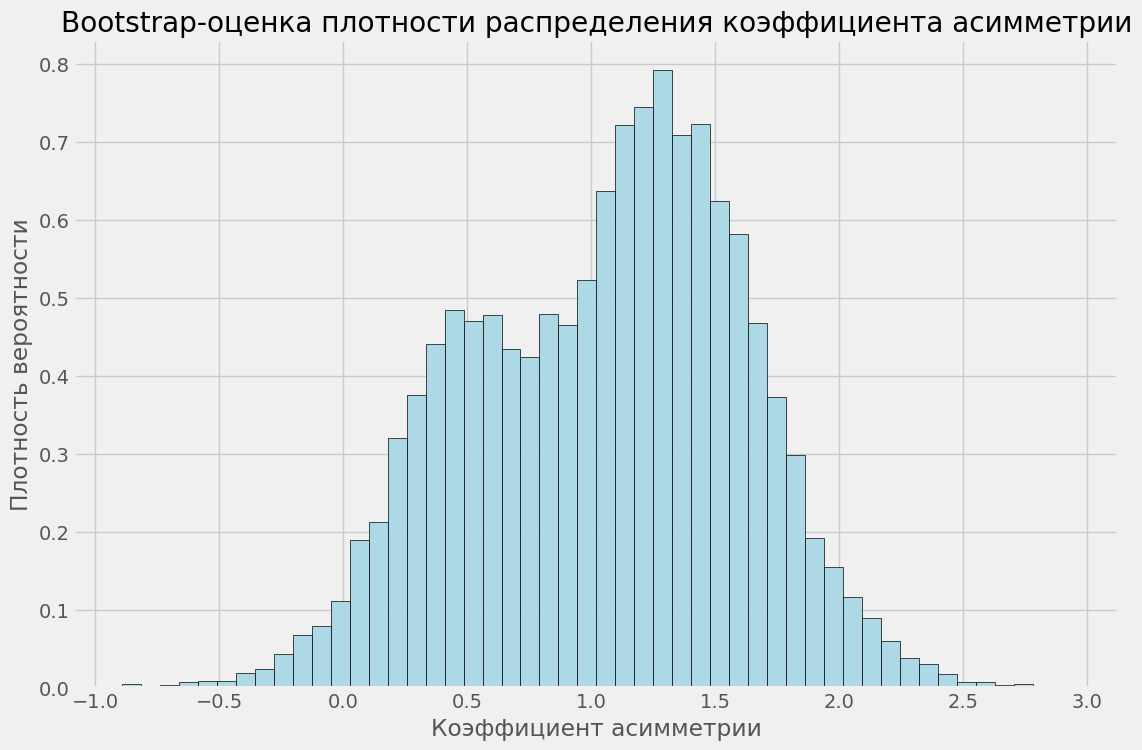

In [131]:
bootstrap_asymmetries = np.zeros(shape=N)

for i in range(N):
    bootstrap_sample = np.random.choice(sample, size=n)
    bootstrap_asymmetries[i] = asymmetry_coefficient(bootstrap_sample)

print("Параметры оценки: ")
print(f"μ = {np.average(bootstrap_asymmetries)}")
print(f"σ = {np.std(bootstrap_asymmetries)}")
print(f"Вероятность того, что <1: {np.mean(bootstrap_asymmetries < 1)}")

plt.figure(figsize=(12, 8))
plt.hist(bootstrap_asymmetries, bins=50, density=True, color='lightblue', edgecolor='black')
plt.xlabel('Коэффициент асимметрии')
plt.ylabel('Плотность вероятности')
plt.title('Bootstrap-оценка плотности распределения коэффициента асимметрии')
plt.show()

## Плотность распределения медианы выборки по bootstrap

### Расчет плотности распределения медианы

In [132]:
def kappa(x):
    k = n // 2 + 1
    
    if x < 0:
        return 0.0
    
    p_x = np.exp(-x)
    F_x = 1 - np.exp(-x)
    
    C = math.comb(n - 1, k - 1)
    
    return n * p_x * C * (1 - F_x)**(n - k) * F_x**(k - 1)


### BOOTSTRAP

In [133]:
bootstrap_medians = np.zeros(N)

for i in range(N):
    bootstrap_sample = np.random.choice(sample, size=n)
    bootstrap_medians[i] = np.median(bootstrap_sample)


### Сравнение теоретической оценки и BOOTSTRAP

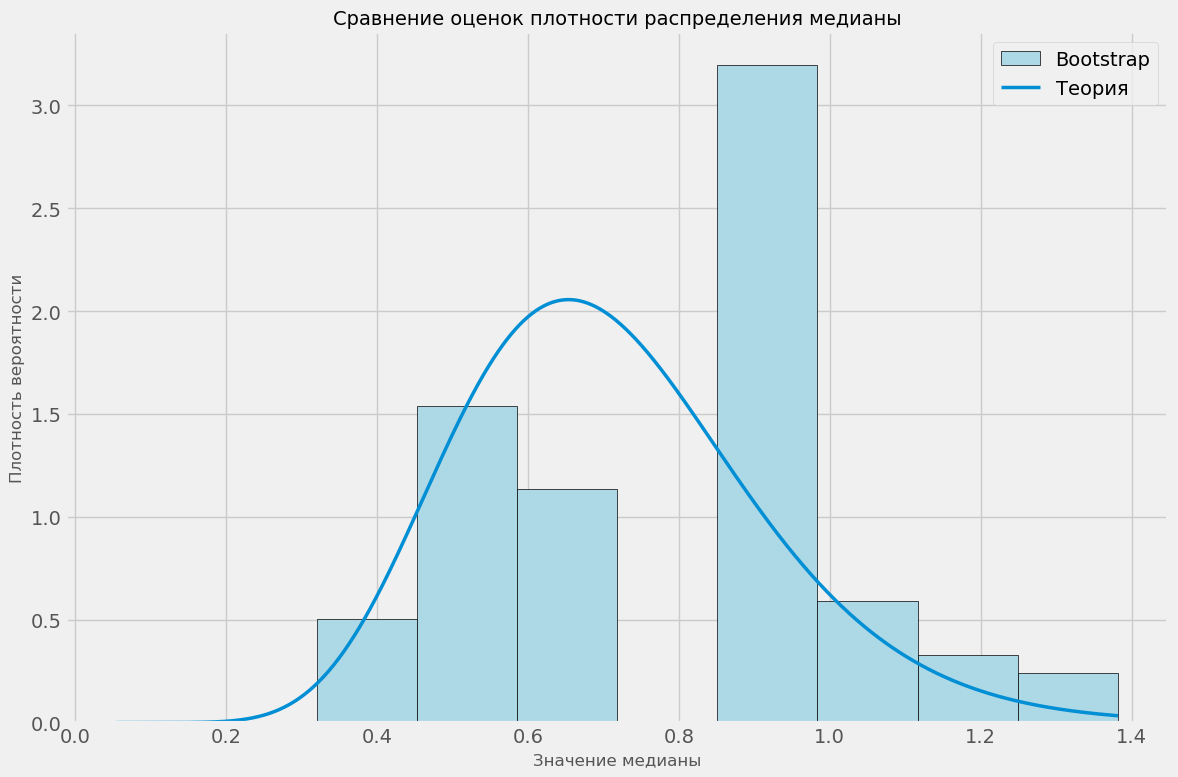

In [134]:
plt.figure(figsize=(12, 8))

plt.hist(bootstrap_medians, density=True, 
         color='lightblue', edgecolor='black', 
         label='Bootstrap')

x = np.linspace(bootstrap_medians.min(), bootstrap_medians.max(), 1000)
y = [kappa(x_i) for x_i in x]
plt.plot(x, y, linewidth=2.5, 
         label='Теория')


plt.xlabel('Значение медианы', fontsize=12)
plt.ylabel('Плотность вероятности', fontsize=12)
plt.title('Сравнение оценок плотности распределения медианы', fontsize=14)
plt.legend()


plt.tight_layout()
plt.show()
